## 1. 상황 인식

'모두 카페'라는 작은 스터디 카페..!  
월 매출액 정도만 간신히 알고 있을 뿐, 스터디 카페의 매출 추세나 음료와 음식별 판매금액 같은 내용을 전혀 모름..  
앞으로 '모두 카페'가 더 잘되기 위한 운영 전략 제시를 원함!

## 2. 문제 정의

> 핵심문제: 모두 카페의 상태는 어떤가?
- 월별 매출액 추세
- 가장 인기있는 음식/음료
- 가장 많이 팔린 입장권 종류

MECE를 이용한 문제 정의
- 'ME'가 실패하면 혼동을 발생시키고 효율성이 하락
- 'CE'가 실패하면 목표에서 벗어나고 효과성이 하락


좋은 문제 정의의 특징
- 핵심적인 질문 또는 분명한 가설
- 일반적이지 않고 아주 구체적인 표현
- 실현 가능한 목표
- 이해관계자에게 통찰력을 주는 관점 제시

> 문제정의: 시간대별 가장 잘 팔리는 상품을 분석하고 매출 향상을 위한 전략 제시

## 3. 데이터 분석

### (1) 필요한 모듈 import하기

In [1]:
# Pandas, Numpy, Matplotlib, Seaborn을 호출
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
plt.style.use('default')

# sklearn라이브러리 중 필요한 모듈을 호출
from sklearn.cluster import KMeans
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)
print("완료!")

완료!


### (2) 데이터 준비

In [2]:
# 데이터 호출하기
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

- entry_data: '모두 스터디카페'의 시간별 입장 기록 데이터
- sales_data: '모두 스터디카페'의 시간별 음식/음료 판매 데이터
- item_data: '모두 스터디카페'에서 판매하고 있는 음식/음료 종류와 가격
- item_entry_data: '모두 스터디카페'에서 판매하고 있는 입장권 종류와 가격

In [3]:
# entry_data 데이터 정보 확인하기
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [4]:
# sales_data 데이터 정보 확인하기
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [5]:
# item_data 데이터 정보 확인하기
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [6]:
# item_entry_data 데이터 정보 확인하기
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


In [7]:
item_entry_data['분류'].value_counts()

심야-조조    10
일반인       8
한국대생      7
18시이후     4
기본        3
기본그룹      2
Name: 분류, dtype: int64

### (3) 데이터 전처리 - entry_data

In [8]:
#전체 행 수와 중복행 확인
print('전체 행 수')
print(len(entry_data))
print(len(sales_data))
print(len(item_data))
print(len(item_entry_data))

print('')

print('중복행 수')
print(entry_data.duplicated().sum())
print(sales_data.duplicated().sum())
print(item_data.duplicated().sum())
print(item_entry_data.duplicated().sum())

전체 행 수
22555
7105
174
34

중복행 수
3234
434
0
0


한 데이터 내에 중복된 값이 많으니까 제거를 해준다.

In [9]:
#중복행 제거
entry_data_n = entry_data.drop_duplicates()
sales_data_n = sales_data.drop_duplicates()

print(len(entry_data_n))
print(len(sales_data_n))

19321
6671


요금제명 컬럼에 해당하는 데이터가 너무 중구난방하게 많다. 비슷한 요금제명끼리 통일해서 묶어준다.

In [10]:
entry_data_n['요금제명'].unique()

array(['시간요금제(1시간)', '무제한 입장권', '한국대생 무제한 입장권', '기간권', '시간요금제(3시간)',
       '심야-조조무제한', '시간권', nan, '입장권(종일권)', '한국대생 입장권(종일권)', '1시간',
       '조조무제한', '18시이후 무제한', '3시간', '심야-조조무제한(06시까지)', '이용권',
       '시간 요금제(1시간당)', '시간요금제(1시간당)', '무제한(한국대생)', '1시간 요금제', '무제한(일반요금)',
       '종일요금제', '시간요금제'], dtype=object)

In [11]:
#1시간 요금제 통일
entry_data_n = entry_data_n.replace({'요금제명' : '시간 요금제(1시간당)'}, '시간요금제(1시간)')
entry_data_n = entry_data_n.replace({'요금제명' : '시간요금제(1시간당)'}, '시간요금제(1시간)')
entry_data_n = entry_data_n.replace({'요금제명' : '1시간 요금제'}, '시간요금제(1시간)')
entry_data_n = entry_data_n.replace({'요금제명' : '1시간'}, '시간요금제(1시간)')

#3시간 요금제 통일
entry_data_n = entry_data_n.replace({'요금제명' : '3시간'}, '시간요금제(3시간)')

#일반 무제한 통일
entry_data_n = entry_data_n.replace({'요금제명' : '무제한 입장권'}, '무제한(일반)')
entry_data_n = entry_data_n.replace({'요금제명' : '입장권 (종일권)'}, '무제한(일반)')
entry_data_n = entry_data_n.replace({'요금제명' : '무제한 입장권'}, '무제한(일반)')
entry_data_n = entry_data_n.replace({'요금제명' : '무제한(일반요금)'}, '무제한(일반)')
entry_data_n = entry_data_n.replace({'요금제명' : '종일요금제'}, '무제한(일반)')
entry_data_n = entry_data_n.replace({'요금제명' : '입장권(종일권)'}, '무제한(일반)')
entry_data_n = entry_data_n.replace({'요금제명' : '시간권'}, '무제한(일반)')
entry_data_n = entry_data_n.replace({'요금제명' : '이용권'}, '무제한(일반)')
entry_data_n = entry_data_n.replace({'요금제명' : '시간요금제'}, '무제한(일반)')
entry_data_n = entry_data_n.replace({'요금제명' : '기간권'}, '무제한(일반)')

#한국대 무제한 통일
entry_data_n = entry_data_n.replace({'요금제명' : '한국대생 무제한 입장권'}, '무제한(한국대생)')
entry_data_n = entry_data_n.replace({'요금제명' : '한국대생 입장권(종일권)'}, '무제한(한국대생)')

#심야 무제한 통일
entry_data_n = entry_data_n.replace({'요금제명' : '심야-조조무제한'}, '무제한(야간)')
entry_data_n = entry_data_n.replace({'요금제명' : '조조무제한'}, '무제한(야간)')
entry_data_n = entry_data_n.replace({'요금제명' : '18시이후 무제한'}, '무제한(야간)')
entry_data_n = entry_data_n.replace({'요금제명' : '심야-조조무제한(06시까지)'}, '무제한(야간)')

In [12]:
entry_data_n['요금제명'].unique()

array(['시간요금제(1시간)', '무제한(일반)', '무제한(한국대생)', '시간요금제(3시간)', '무제한(야간)', nan],
      dtype=object)

In [13]:
#결측행 제거
entry_data_n.dropna(how='any', axis=0, inplace = True)
entry_data_n['요금제명'].unique()

array(['시간요금제(1시간)', '무제한(일반)', '무제한(한국대생)', '시간요금제(3시간)', '무제한(야간)'],
      dtype=object)

In [14]:
entry_data_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19090 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    19090 non-null  object
 1   입실      19090 non-null  object
 2   퇴실      19090 non-null  object
 3   이용      19090 non-null  object
 4   위치      19090 non-null  object
 5   금액      19090 non-null  int64 
 6   구분      19090 non-null  object
 7   고객      19090 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.3+ MB


### (4) 모두카페현황 - 월별 매출액 추세(sales_data)

In [15]:
item_entry_data['상품명'].value_counts()

일반요금제        8
한국대생 요금제     7
심야-조조 요금제    7
기본요금제        5
거리두기4단계      3
추석당일 요금제     3
마감요금         1
Name: 상품명, dtype: int64

In [16]:
# 문제 1: 월별 매출액 추세
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data.copy()

# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = temp_var['결제일시'].str[:7]

In [17]:
temp_var.head(2)

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04


In [18]:
# sales_data의 결제금액에 포함된 쉼표(,) 지우기
temp_var['결제금액'] = temp_var['결제금액'].str.replace(',', '')

# sales_data의 결제금액을 숫자형태로 바꾸기
temp_var['결제금액'] = temp_var['결제금액'].astype(int)

# temp_var의 payment열을 date 기준으로 집계하기
payment_data = temp_var['결제금액'].groupby(temp_var['date']).sum()

In [19]:
payment_data

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: 결제금액, dtype: int64

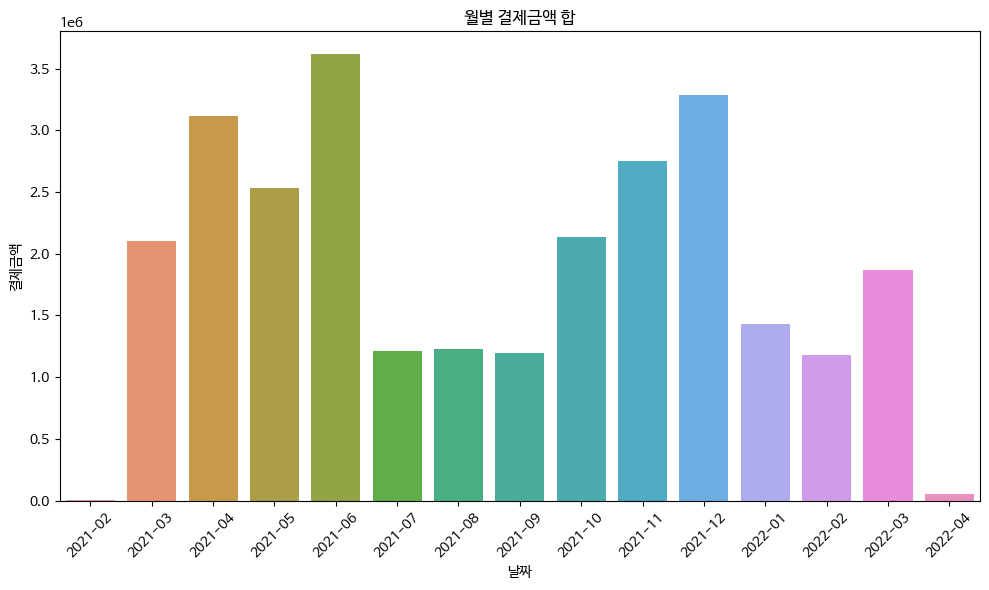

In [20]:
# 집계 결과를 시각화하기
plt.figure(figsize=(10, 6))
sns.barplot(payment_data.index, payment_data.values)

plt.title('월별 결제금액 합')
plt.xlabel('날짜')
plt.ylabel('결제금액')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

시험기간인 4월, 6월, 10월\~12월에 모두 카페 이용률이 상승, 방학기간인 7월\~9월에 하락

### (5) 모두카페현황 - 가장 인기있는 음식/음료(sales_data)

In [21]:
temp_var['판매수량'].value_counts()

 1    6945
-1     160
Name: 판매수량, dtype: int64

In [22]:
# 문제 2: 가장 인기 있는 음식/음료
# temp_var의 상품명을 value_counts를 이용해 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.
# 힌트 코드 : temp_var[temp_var['판매수량']==-1]
temp_var[temp_var['판매수량'] != -1]['상품명'].value_counts()

# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
sales_cnt = temp_var[temp_var['판매수량'] != -1]['상품명'].value_counts()
sales_cnt_df = pd.DataFrame({'상품명': sales_cnt.index, '판매량': sales_cnt.values})
items_count = sales_cnt_df.head(10)
items_count

,상품명,판매량
0,김치볶음밥,1204
1,라면,749
2,짜장라면,455
3,치즈불고기볶음밥,420
4,계란추가,314
5,낙지볶음밥,312
6,새우볶음밥,309
7,아메리카노(ICE),284
8,치즈감자튀김,246
9,감자튀김,242


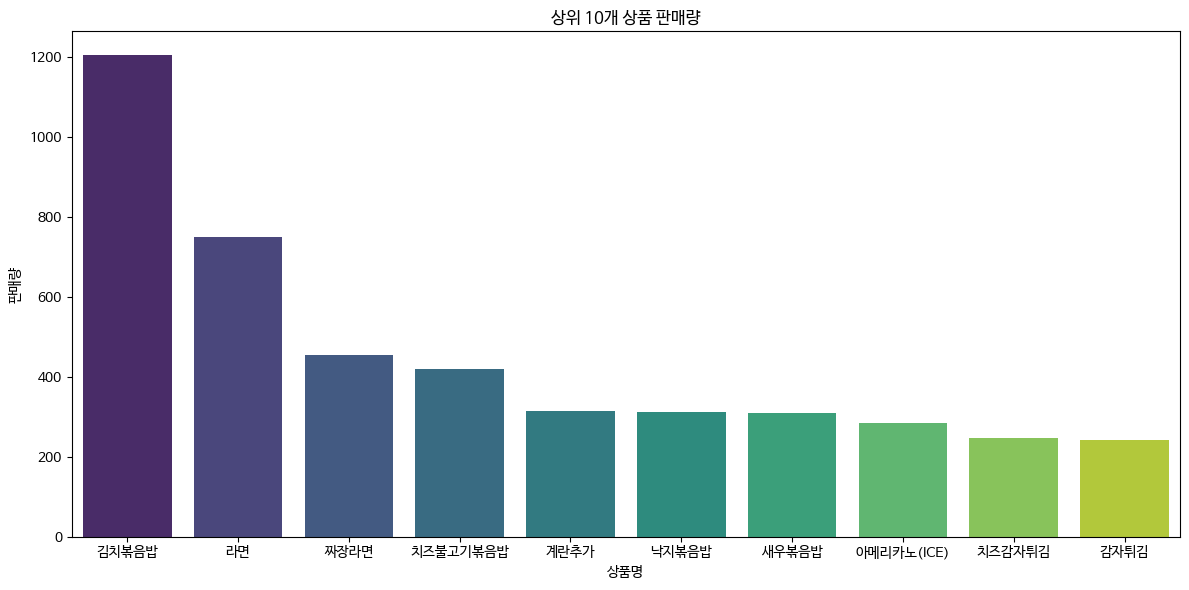

In [23]:
# items_count 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='상품명', y='판매량', data=items_count, palette="viridis")

plt.title('상위 10개 상품 판매량')
plt.xlabel('상품명')
plt.ylabel('판매량')

plt.tight_layout()
plt.show()

김치볶음밥과 라면 판매량이 높다.

In [24]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
temp_var = temp_var[temp_var['판매수량'] != -1]
items_payment = temp_var['결제금액'].groupby(temp_var['상품명']).sum()

# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
items_payment = items_payment.sort_values(ascending=False).head(10)
items_payment = pd.DataFrame({'상품명': items_payment.index, '결제금액': items_payment.values})
items_payment

,상품명,결제금액
0,김치볶음밥,6004400
1,라면,2941500
2,치즈불고기볶음밥,2292600
3,짜장라면,2038500
4,낙지볶음밥,1710700
5,새우볶음밥,1539800
6,치즈감자튀김,1354200
7,감자튀김,1083800
8,아메리카노(ICE),1058100
9,불닭볶음면,693000


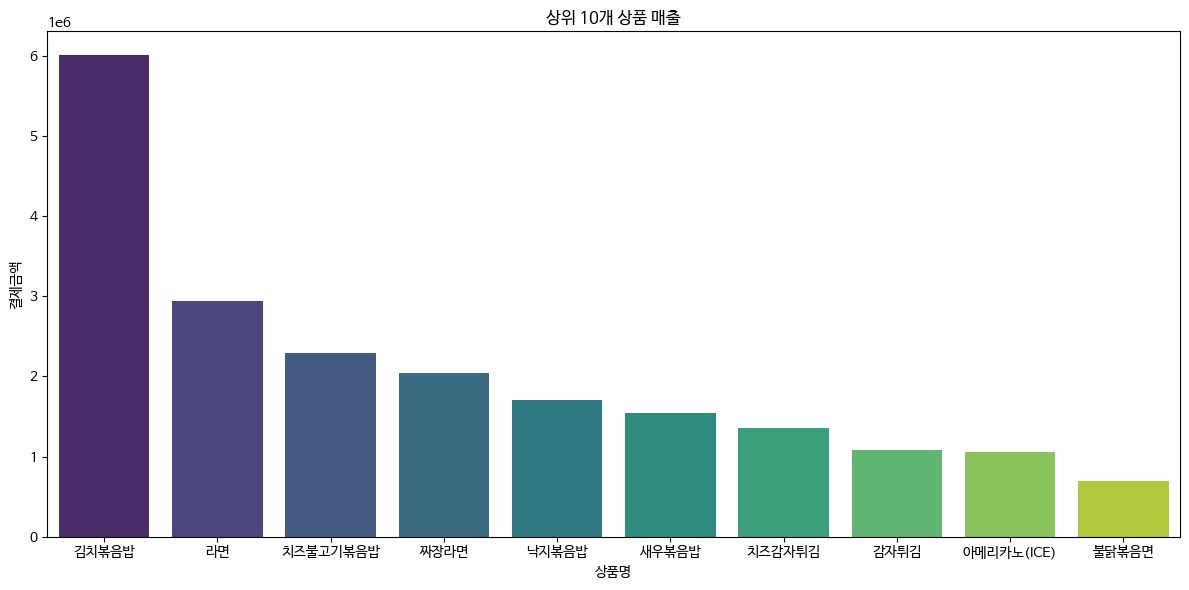

In [25]:
# items_payment 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='상품명', y='결제금액', data=items_payment, palette="viridis")

plt.title('상위 10개 상품 매출')
plt.xlabel('상품명')
plt.ylabel('결제금액')

plt.tight_layout()
plt.show()

### (6) 모두카페현황 - 가장 많이 팔린 입장권 종류(entry_data)

In [26]:
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data_n.copy()
temp_var.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한(일반),2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,무제한(한국대생),2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
7,무제한(한국대생),2022-04-01 19:32,2022-04-01 22:28,오전 2:56:00,선불기2,6400,퇴실,customer498538
11,무제한(한국대생),2022-04-01 18:46,2022-04-01 21:38,오전 2:52:00,선불기2,6400,퇴실,customer899296


In [27]:
temp_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19090 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    19090 non-null  object
 1   입실      19090 non-null  object
 2   퇴실      19090 non-null  object
 3   이용      19090 non-null  object
 4   위치      19090 non-null  object
 5   금액      19090 non-null  int64 
 6   구분      19090 non-null  object
 7   고객      19090 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.3+ MB


In [28]:
# temp_var의 금액을 숫자형태로 변환하기
temp_var['금액'] = temp_var['금액'].astype(int)

# temp_var의 금액을 요금제명을 기준으로 집계하기
fee_payment = temp_var['금액'].groupby(temp_var['요금제명']).sum()

# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
fee_payment = fee_payment.sort_values(ascending=False)
fee_payment = pd.DataFrame({'요금제명': fee_payment.index, '결제금액': fee_payment.values})
fee_payment

,요금제명,결제금액
0,무제한(한국대생),67382300
1,무제한(일반),21868200
2,무제한(야간),15144000
3,시간요금제(1시간),1857000
4,시간요금제(3시간),1357000


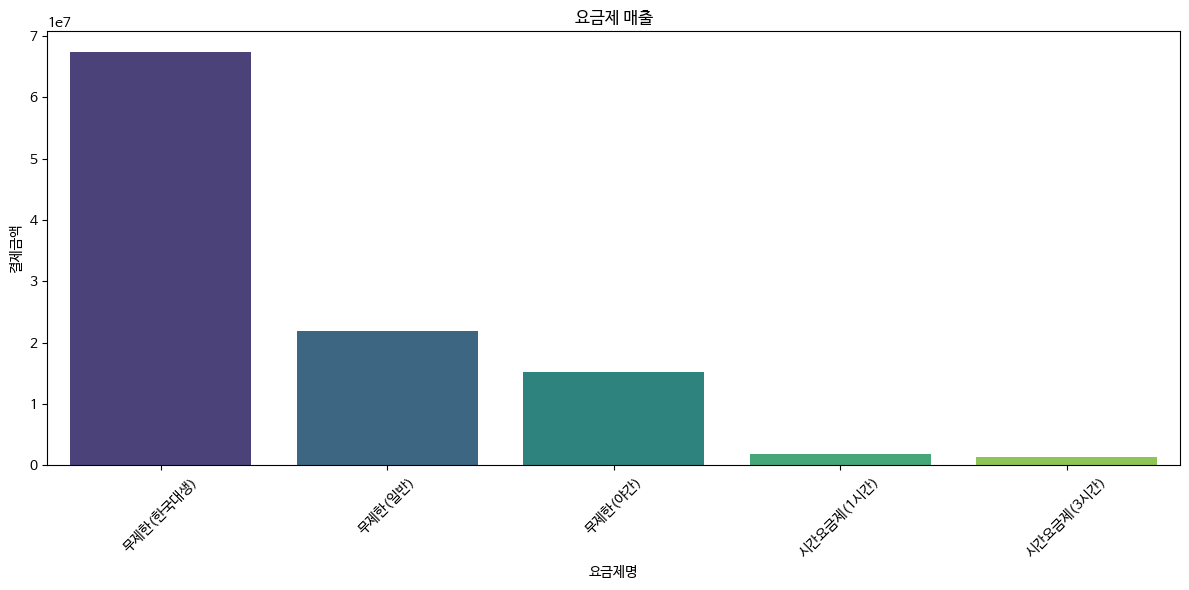

In [29]:
# fee_payment 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='요금제명', y='결제금액', data=fee_payment, palette="viridis")

plt.title('요금제 매출')
plt.xlabel('요금제명')
plt.ylabel('결제금액')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

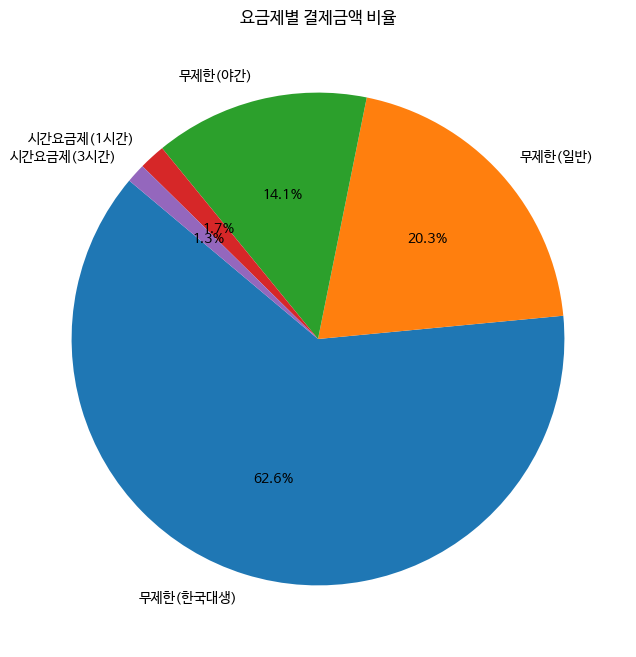

In [30]:
# 파이 차트로 비율 시각화
plt.figure(figsize=(8, 8))
plt.pie(fee_payment['결제금액'], labels = fee_payment['요금제명'], autopct='%1.1f%%', startangle=140)

plt.title('요금제별 결제금액 비율')
plt.show()

무제한(한국대생) 요금제가 압도적으로 많이 팔렸다.

### (7) 데이터 분석 - 상품 분석

#### ■ 무슨 시간대에 무슨 상품이 많이 팔릴까?

In [31]:
# 시간대별 결제금액을 구하기 위해 sales_data 복사
temp_var = sales_data.copy()

# '결제일시' 컬럼 타입 변환
temp_var['결제일시'] = pd.to_datetime(temp_var['결제일시'])
# 결제 시간 컬럼 생성
temp_var['time'] = temp_var['결제일시'].dt.hour

In [32]:
temp_var.head(2)

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,time
0,2022-04-01 19:41:00,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,19
1,2022-04-01 19:41:00,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,19


In [33]:
temp_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   결제일시    7105 non-null   datetime64[ns]
 1   판매위치    7105 non-null   object        
 2   상품명     7105 non-null   object        
 3   결제방식    7105 non-null   object        
 4   비고      7105 non-null   object        
 5   판매수량    7105 non-null   int64         
 6   결제금액    7105 non-null   object        
 7   고객      6300 non-null   object        
 8   time    7105 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 499.7+ KB


In [34]:
# '결제금액' 컬럼 전처리
temp_var['결제금액'] = temp_var['결제금액'].str.replace(',', '')
temp_var['결제금액'] = temp_var['결제금액'].astype(int)

# temp_var의 결제금액 열을 time기준으로 집계하기
payment_time = temp_var['결제금액'].groupby(temp_var['time']).sum()

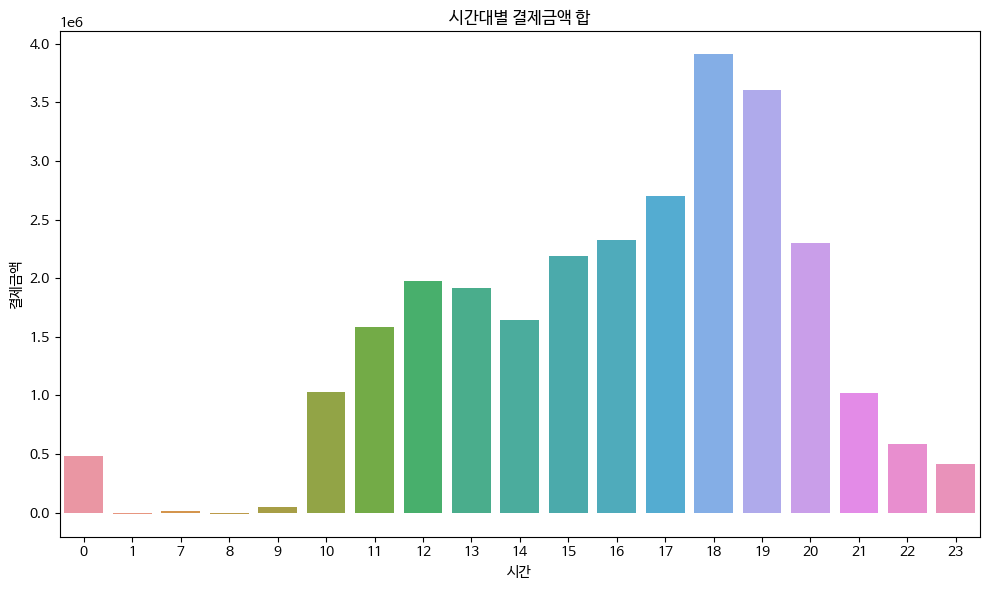

In [35]:
# 집계 결과를 시각화하기
plt.figure(figsize=(10, 6))
sns.barplot(payment_time.index, payment_time.values)

plt.title('시간대별 결제금액 합')
plt.xlabel('시간')
plt.ylabel('결제금액')

plt.tight_layout()
plt.show()

18시-19시 쯤에 음식을 구매하는 사람들이 많다. 
- 해당 시간대에 잘 판매되는 상품명을 분석해보자..! 이를 통해 인기 있는 상품을 파악하여 해당 상품의 마케팅을 강화하거나 관련 상품을 추천하는 전략을 세울 수 있다.

In [36]:
# 18시, 19시에 해당하는 데이터만 추출
time_18_19 = temp_var[(temp_var['time'] == 18) | (temp_var['time'] == 19)]
hour_sales = time_18_19.groupby(['time', '상품명']).size().unstack(fill_value=0)
hour_sales

상품명,(면)계란추가-국물라면,(면)계란후라이 추가-불닭/짜장,(면)치즈추가,(밥)계란후라이 추가,(밥)슈레드치즈추가,2인라면,2인불닭,2인짜장라면,감자튀김,계란추가,...,쿠키(마카다미아),쿠키(오트밀),쿠키(초코칩),크로플,페퍼민트(HOT),페퍼민트(ICE),플레인요거트스무디,한돈간장불고기덮밥,한돈고추장불고기덮밥,허니밀크쉐이크
time,,,,,,,,,,,,,,,,,,,,,
18,1,2,1,1,1,22,3,7,29,38,...,5,6,9,0,0,1,0,2,2,1
19,1,2,1,0,0,16,0,5,32,45,...,11,7,14,1,1,1,3,3,1,1


In [37]:
# 컬럼 수가 너무 많아 판매량이 낮은 컬럼은 제거(기준: 데이터 전체 평균 이하는 제거)
hour_sales2 = hour_sales[hour_sales >= hour_sales.mean().mean()]
hour_sales2.dropna(axis = 1, how = 'all', inplace = True) # 18시, 19시에 모두 nan인 경우의 컬럼만 제거
hour_sales2.fillna(0, inplace = True) # nan값은 0으로 채우기
hour_sales2 = hour_sales2.astype(int) # float형을 int형으로 변환
hour_sales2

상품명,2인라면,감자튀김,계란추가,김치볶음밥,낙지볶음밥,라면,만두라면,불닭볶음면,새우볶음밥,아메리카노(ICE),아이스티,짜장라면,초코머핀,치즈감자튀김,치즈불고기볶음밥,치즈추가,카페모카(ICE),쿠키(초코칩)
time,,,,,,,,,,,,,,,,,,
18,22,29,38,209,69,102,20,31,45,18,16,62,14,29,66,33,30,0
19,16,32,45,167,45,79,21,30,46,25,0,60,20,27,72,19,0,14


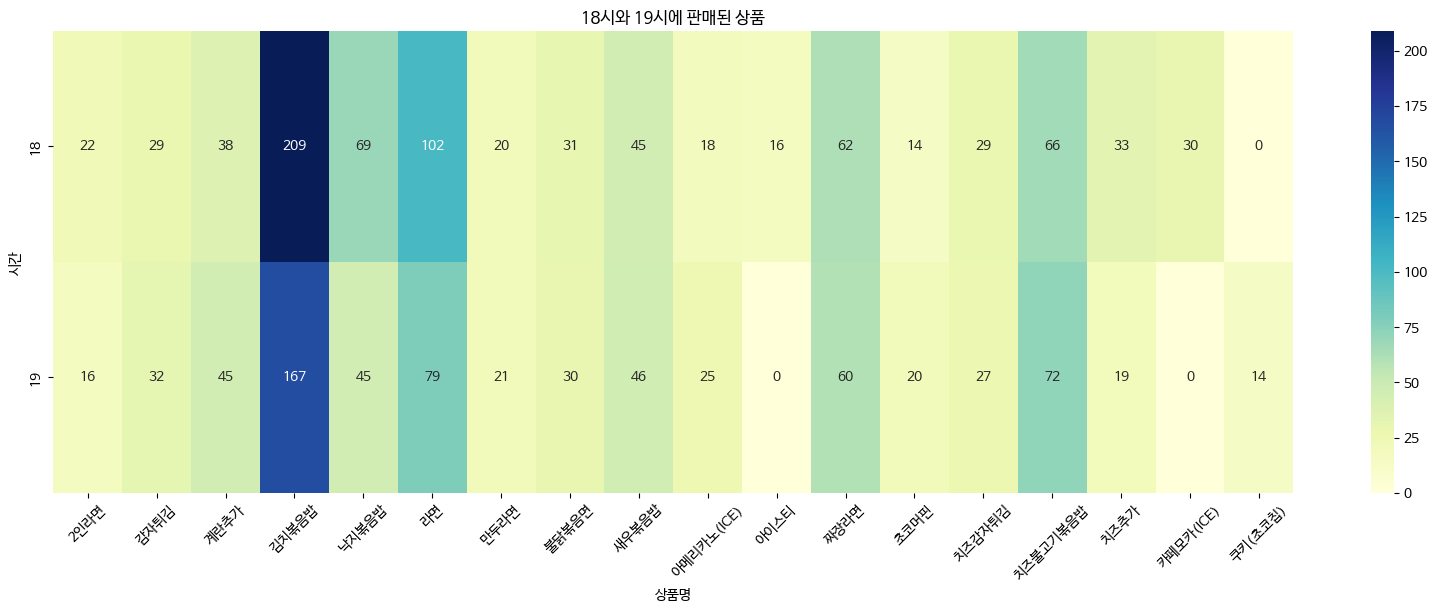

In [38]:
# 시각화
plt.figure(figsize=(20, 6))
sns.heatmap(hour_sales2, annot=True, cmap='YlGnBu', fmt='d')
plt.title('18시와 19시에 판매된 상품')
plt.xlabel('상품명')
plt.ylabel('시간')
plt.xticks(rotation=45)
plt.show()

In [39]:
temp_var['상품명'].value_counts()

김치볶음밥           1211
라면               756
짜장라면             457
치즈불고기볶음밥         423
계란추가             315
                ... 
녹차(HOT)            1
짜장라면(계란추가)         1
이어폰(커널형)           1
오늘은 한돈고추장불고기       1
오늘은 한돈간장불고기        1
Name: 상품명, Length: 100, dtype: int64

김치볶음밥, 라면이 가장 많이 판매되고, 치즈불고기볶음밥, 짜장라면도 어느정도 판매가 되는 편이다.  
시간대에 관계는 없지만, 계란 추가 수요도 꽤 높은 편이다.
- 김치볶음밥에 만두 2p 또는 감자튀김를 추가한 세트 메뉴 개발 (감자튀김과 만두라면 수요가 적으니 감자튀김, 만두 재고를 여기서 활용)
- 1, 2위인 김치볶음밥과 라면을 반반으로 조합한 반반 메뉴 개발
- 계란추가 5회 채울 시 계란추가 1회 무료 제공(쿠폰 제작)을 하여 계란 추가 옵션 수요 늘리기  

#### ■ 무슨 시간대에 무슨 음료/디저트가 많이 팔릴까?

item_data와 상품명을 기준으로 데이터를 병합하고, 분류 컬럼에서 '디저트'에 해당하는 데이터를 추출해서 시간대별 디저트 주문량을 확인해보자!!

In [40]:
temp_var.head(2)

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,time
0,2022-04-01 19:41:00,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,19
1,2022-04-01 19:41:00,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,19


In [41]:
item_data.head(2)

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"


In [42]:
len(temp_var['상품명'].unique()), len(item_data['상품명'].unique())

(100, 98)

In [43]:
# 두 데이터 병합(기준: 상품명)
merged_df = temp_var.merge(item_data, on='상품명', how='left')
print(f'데이터 크기:{merged_df.shape}')
merged_df.head(2)

데이터 크기:(24243, 12)


,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,time,구분,분류,판매금액
0,2022-04-01 19:41:00,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,19,68.0,음식,"4,500원"
1,2022-04-01 19:41:00,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,19,NaN,NaN,NaN


In [44]:
a = merged_df['분류'].isna().sum()
print(f'분류 컬럼 결측치 개수: {a}')
print('-'*30)
print(merged_df['분류'].value_counts())

분류 컬럼 결측치 개수: 2
------------------------------
음식            19171
커피             2481
차가운음료(커피외)     1214
디저트             931
스무디&쉐이크         310
따뜻한음료(커피외)      129
포장                4
게임&TV             1
Name: 분류, dtype: int64


In [45]:
# 디저트나 음료에 해당하는 데이터만 추출
desert_df = merged_df[(merged_df['분류'] == '커피') | (merged_df['분류'] == '차가운음료(커피외)') | 
          (merged_df['분류'] == '디저트') | (merged_df['분류'] == '스무디&쉐이크') | (merged_df['분류'] == '따뜻한음료(커피외)')]

desert_df.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,time,구분,분류,판매금액
13,2022-04-01 15:19:00,선불기1,아이스티,신용카드,결제완료,1,3900,customer630809,15,109.0,차가운음료(커피외),"3,500원"
14,2022-04-01 15:19:00,선불기1,아이스티,신용카드,결제완료,1,3900,customer630809,15,128.0,차가운음료(커피외),"1,000원"
15,2022-04-01 15:19:00,선불기1,아이스티,신용카드,결제완료,1,3900,customer630809,15,136.0,차가운음료(커피외),"3,900원"
21,2022-04-01 12:03:00,선불기1,크로플,신용카드,결제완료,1,5500,customer977070,12,9.0,디저트,"5,500원"
28,2022-03-31 15:36:00,선불기1,쿠앤크쉐이크,신용카드,결제완료,1,5900,customer490619,15,32.0,스무디&쉐이크,"5,500원"


In [46]:
# 시간대별 분류별 주문량 보기 위한 데이터 그룹화
desert_all_time = desert_df.groupby(['time', '분류']).size().unstack(fill_value=0)
desert_all_time['total'] = desert_all_time.sum(axis = 1)
desert_all_time = desert_all_time.reset_index()
desert_all_time.head()

분류,time,디저트,따뜻한음료(커피외),스무디&쉐이크,차가운음료(커피외),커피,total
0,0,34,4,2,3,78,121
1,1,0,0,0,0,12,12
2,7,0,0,0,3,12,15
3,8,0,0,0,3,0,3
4,9,0,0,6,6,7,19


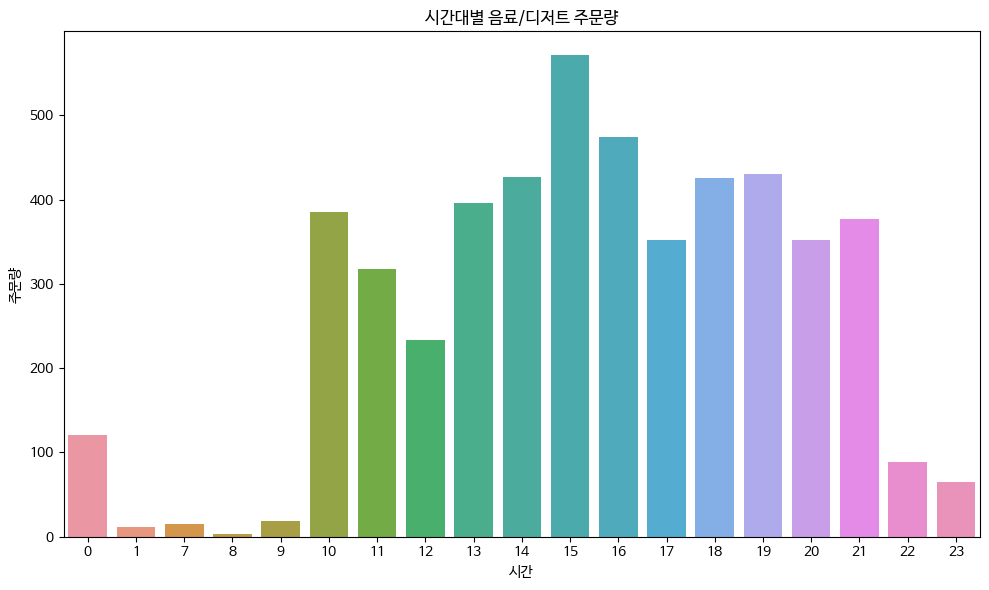

In [47]:
# 집계 결과를 시각화하기
plt.figure(figsize=(10, 6))
sns.barplot(data = desert_all_time, x = 'time', y = 'total')

plt.title('시간대별 음료/디저트 주문량')
plt.xlabel('시간')
plt.ylabel('주문량')

plt.tight_layout()
plt.show()

14시 ~ 16시에 음료/디저트 주문량이 높다. 각 시간대별 가장 많이 팔린 상품을 분석해봐야겠다.  
22시 이후로 음료/디저트 주문량이 급감한다. -> 야간권 요금제에 음료/디저트를 묶어서 판매하는 전략을 세운다.

In [48]:
# time이 16, 15, 16에 해당하는 데이터 추출하고 데이터 그룹화
desert1 = desert_df[(desert_df['time'] == 14) | (desert_df['time'] == 15) | (desert_df['time'] == 16)]
desert_time = desert1.groupby(['time', '분류']).size().unstack(fill_value=0)
desert_time

분류,디저트,따뜻한음료(커피외),스무디&쉐이크,차가운음료(커피외),커피
time,,,,,
14,59,13,21,86,248
15,98,13,38,145,277
16,118,10,44,154,148


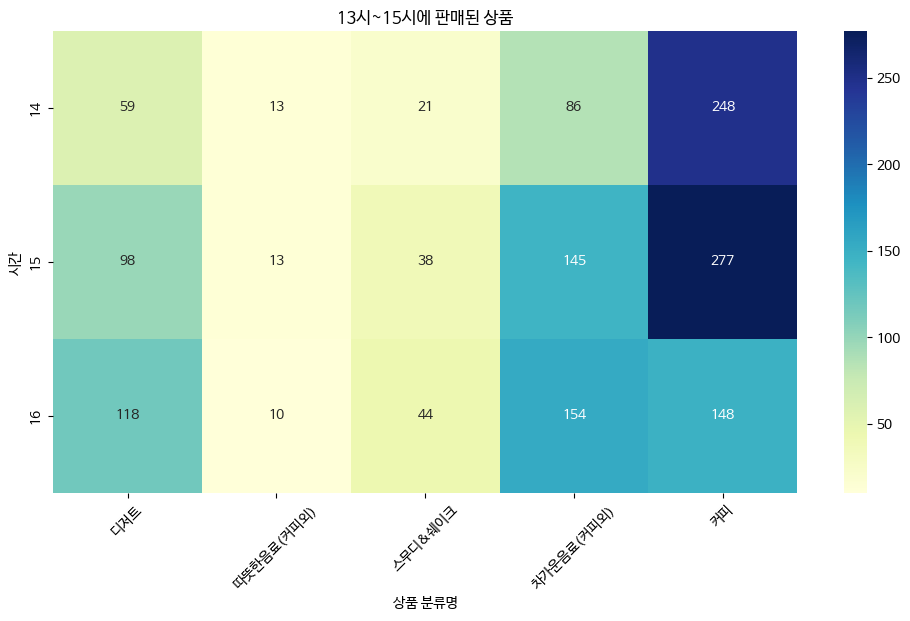

In [49]:
# 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(desert_time, annot=True, cmap='YlGnBu', fmt='d')
plt.title('13시~15시에 판매된 상품')
plt.xlabel('상품 분류명')
plt.ylabel('시간')
plt.xticks(rotation=45)
plt.show()

14시\~15시에 커피 판매량이 높고, 15시\~16시에 차가움음료(커피외)와 디저트 판매량이 증가한다.
- 14-16시에 특별히 진행되는 이벤트로 디저트와 음료 세트 메뉴를 개발하여 디저트 판매량을 더 늘리는 전략을 구상
- 스무디&쉐이크 수요를 조금 더 늘리기 위해 쿠폰을 제작해 몇 회 주문시 쿠키 제공 등과 같은 쿠폰 이벤트 구상

#### ■ 수요가 낮은 음식은 뭘까?

In [50]:
# 집계 결과를 데이터프레임으로 변환하고, 하위 10개 선정하기
sales_cnt2 = merged_df[merged_df['분류'] == '음식']
sales_cnt3 = sales_cnt2[sales_cnt2['판매수량'] != -1]['상품명'].value_counts()
sales_cnt_df2 = pd.DataFrame({'상품명': sales_cnt3.index, '판매량': sales_cnt3.values})
items_count2 = sales_cnt_df2.tail(10)
items_count2

,상품명,판매량
23,순살닭다리덮밥,15
24,2인불닭,14
25,버팔로윙 6pc,13
26,(면)계란추가-국물라면,10
27,버팔로윙 10pc,9
28,치킨카라아케 10pc,4
29,(밥)체다치즈추가,4
30,(밥)슈레드치즈추가,3
31,(밥)계란후라이 추가,3
32,비엔나소세지(토핑),3


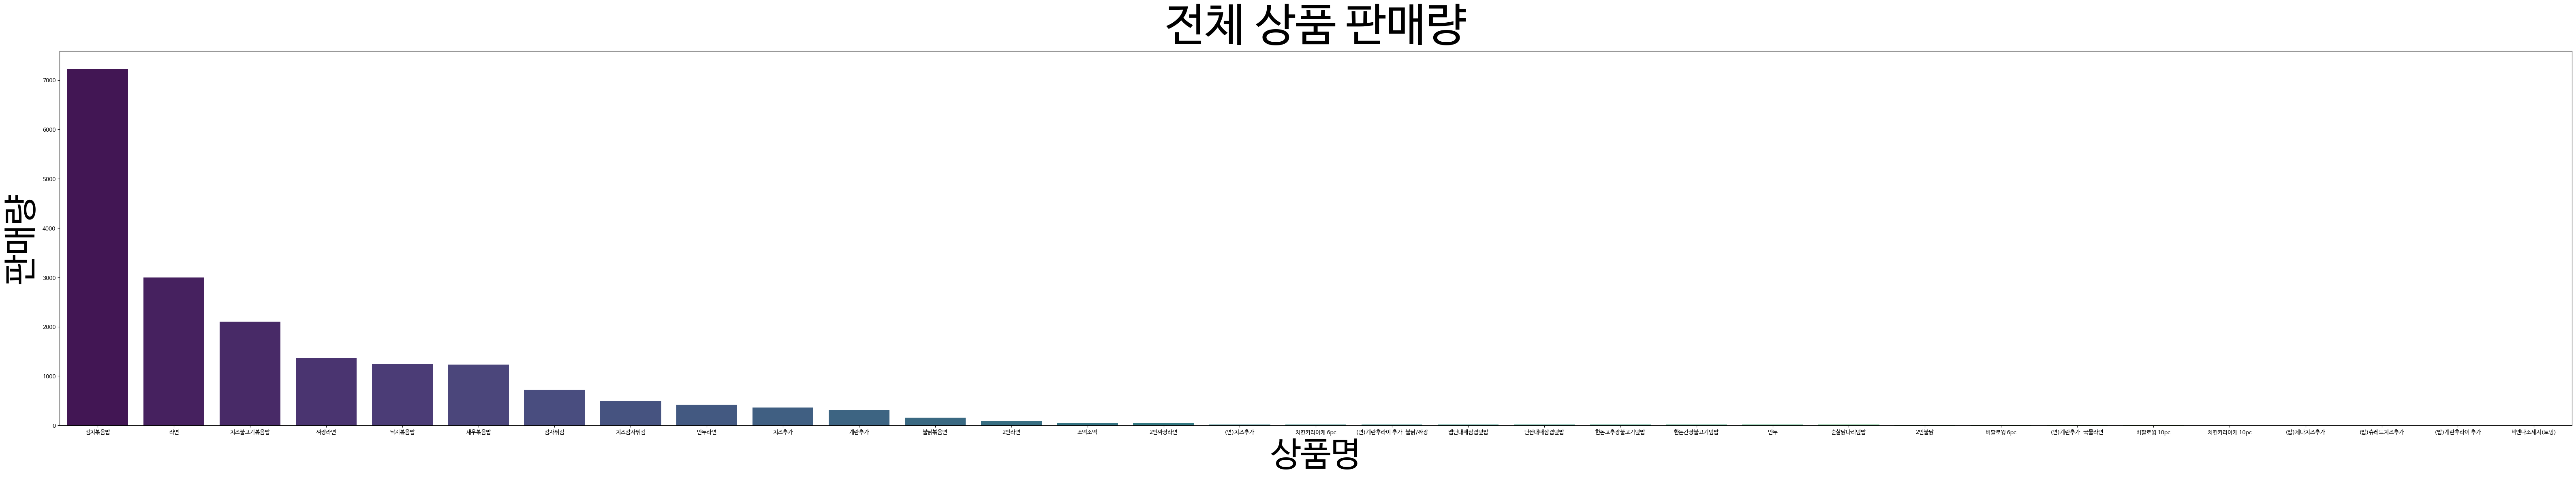

In [51]:
# sales_cnt_df2 시각화(전체 상품 판매량)
plt.figure(figsize=(80, 12))
sns.barplot(x='상품명', y='판매량', data=sales_cnt_df2, palette="viridis")

plt.title('전체 상품 판매량', fontsize = 80)
plt.xlabel('상품명', fontsize = 60)
plt.ylabel('판매량', fontsize = 60)

plt.show()

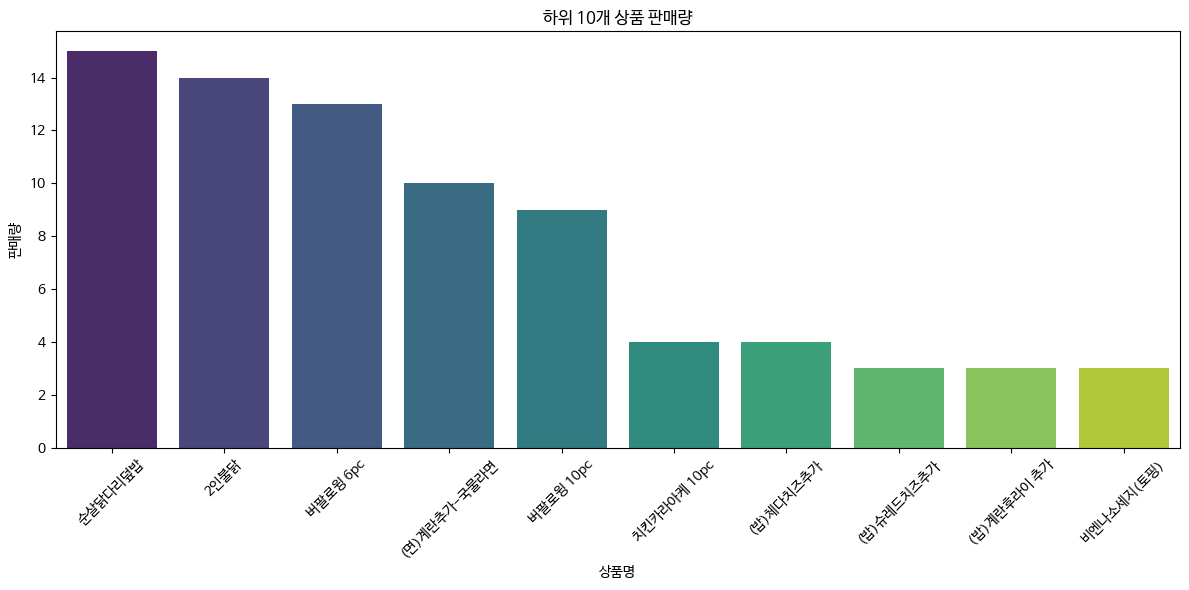

In [52]:
# items_count2 시각화(하위 10개 상품 판매량)
plt.figure(figsize=(12, 6))
sns.barplot(x='상품명', y='판매량', data=items_count2, palette="viridis")

plt.title('하위 10개 상품 판매량')
plt.xlabel('상품명')
plt.ylabel('판매량')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

In [53]:
toping = [i for i in sales_cnt_df2['상품명'] if '추가' in i]
toping

['치즈추가',
 '계란추가',
 '(면)치즈추가',
 '(면)계란후라이 추가-불닭/짜장',
 '(면)계란추가-국물라면',
 '(밥)체다치즈추가',
 '(밥)슈레드치즈추가',
 '(밥)계란후라이 추가']

- 메뉴가 너무 많고 복잡해서 필요없는 메뉴는 제거해도 될 것 같다.
- 전체 상품 판매량을 시각화한 결과, 상위 11개 메뉴 외에는 수요가 높지 않다.
- 토핑이 다양한 것 같은데 '계란추가'외 다른 토핑은 수요가 높지 않다. 
- 사이드 메뉴 중에서 인기가 없는 상품은 굳이 메뉴에 유지시킬 필요가 없을 것 같다.
- 상위 10개 상품 판매량 시각화 결과, 10위인 감자튀김 메뉴도 200은 넘겼다. 판매량이 20도 안되는 메뉴를 굳이 유지시킬 필요가 없을 것 같다.

## 4. 전략 수립 및 실행

**Summary**

**1. 모두카페 현황**
- 모두카페 회원권은 무제한(한국대생)이 약 65% 매출 비중을 차지하고 있으며, 무제한(일반)의 판매 비중은 약 35% 수준임.
- 모두카페 식음료는 시간대 별로 많이 판매되는 상품의 차이를 보인다.
- - 점심시간 이후: 음료 및 디저트
- - 저녁시간에는 식사류


**2. 회원권 분석**
- 대부분의 이용권 매출은 무제한(한국대생)이므로, 사용자 대부분이 한국대 생으로 추정된다.
- 무제한 이용권(일반 및 야간)의 매출이 전체 매출의 약 35% 정도 차지하고 있어 일반 사용자도 적지 않은 비중을 차지하고 있다.
- 시간요금제(1시간, 3시간) 이용권은 전체 매출의 약 3%로 적은 비중을 보인다.

**3. 식음료 분석**
- 저녁식사 시간대인 18\~19시의 판매액이 가장 높으며, 김치볶음밥, 라면, 짜장라면, 치즈불고기 순으로 상위 판매를 보임.
- 음료 및 디저트는 식사시간 이후인 3\~4시, 20\~21시 사이에 높은 판매를 보이며, 특히 음료의 판매가 디저트보다 높음.

**4. 제언사항**
> <입장권>
> - 시간 요금제 판매가 저조하므로 계속 시간 요금제를 유지할 경우, 식음료 판매 시간에 맞춰 별도의 콤보 요금제를 도입하는 것이 좋을 것으로 예상  
> 예) 낮: 3시간이용권 + 커피 / 저녁: 3시간 이용권 + 김치볶음밥

> <식음료>
> - 식음료 매출이 식사류에 집중되고 있으며, 특히 상위 판매 중인 일부 메뉴에 집중되고 있으므로 판매 저조한 상품은 판매 중단하는 것이 필요해 보인다.
> - 음료 및 디저트는 식사시간 이후에 판매가 증가하고 있어 식사류와 결합한 콤보 상품으로 음료 매출 증가를 유도하는 것이 필요해 보인다.

## 회고 - 김새봄
### 어려웠던 점 / 느낀점
> - 파이썬 코드를 이용한 데이터 탐색은 평소 사용하던 엑셀보다 어렵게 느껴짐
> - 데이터 탐색에 필요한 코드 연습이 필요해 보임.

### 학습한 내용
> - 시각화를 통한 데이터 분석 프로세스를 경험할 수 있었음.
> - 분석 과정에서 제대로 된 데이터인지 여부를 확인하는 것이 중요하다는 것을 다시 한번 느낌.

## 참고
- 참고한 링크 없음